In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

In [2]:
df=pd.read_csv("/Users/chidam/Desktop/chronic_disease_2011 to 2018_transpose.csv")

In [4]:
df.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Dist. of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,United States
0,2011,0.24841,0.19036,0.23042,0.25388,0.19680,0.17655,0.22433,0.23356,0.20910,...,0.22716,0.20608,0.18503,0.22789,0.22402,0.21678,0.26665,0.21027,0.21213,0.22152
1,2012,0.26601,0.18906,0.23287,0.24573,0.21473,0.19225,0.22419,0.24404,0.21743,...,0.25572,0.20981,0.18255,0.21830,0.22094,0.21335,0.29557,0.20445,0.21808,0.22630
2,2013,0.27281,0.18938,0.23884,0.24969,0.21414,0.18198,0.21518,0.25563,0.21974,...,0.25802,0.20999,0.18691,0.22560,0.21550,0.21599,0.28082,0.22211,0.21668,0.22870
3,2014,0.28045,0.17985,0.22779,0.26373,0.20913,0.18272,0.21716,0.23745,0.22064,...,0.26549,0.21032,0.18417,0.22269,0.21691,0.21445,0.30994,0.22148,0.20522,0.23055
4,2015,0.27488,0.19457,0.22870,0.27232,0.20482,0.18720,0.22478,0.24502,0.21343,...,0.26215,0.22454,0.18654,0.22716,0.21435,0.21016,0.30111,0.22207,0.20197,0.22770


In [10]:
df['Year'].values

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [14]:

data = df['Alabama'].values.tolist()
index= pd.date_range(start='2011', end='2018', freq='AS')#
chronicdisease = pd.Series(data, index)



In [17]:
index

DatetimeIndex(['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [13]:
#understand pd.date_range
pd.date_range(end='1/1/2018', periods=8, freq='AS')

DatetimeIndex(['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [8]:
data

[0.24841,
 0.26600999999999997,
 0.27281,
 0.28045,
 0.27488,
 0.29151,
 0.28953,
 0.29298]

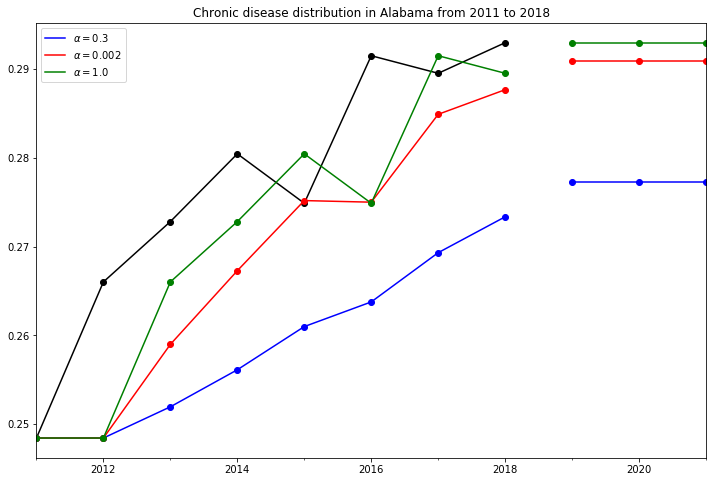

In [26]:
# Here we run three variants of simple exponential smoothing:
# 1.In fit1 we do not use the auto optimization but instead choose to explicitly provide the model with the 𝛼=0.3 
# parameter  
# 2.In fit2 as above we choose an 𝛼=0.002 
# 3.In fit3 we allow statsmodels to automatically find an optimized 𝛼 value for us. This is the recommended approach.

fit1 = SimpleExpSmoothing(chronicdisease).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.3$')
fit2 = SimpleExpSmoothing(chronicdisease).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.002$')
fit3 = SimpleExpSmoothing(chronicdisease).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = chronicdisease.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
plt.title('Chronic disease distribution in Alabama from 2011 to 2018')
plt.show()


In [18]:
#Let's now check how the plot looks when we plot on the data from 2005 to 2018. Will there be any difference in the 
#prediction?


df2=pd.read_csv("/Users/chidam/Desktop/chronic_disease_2010 to 2018_transpose.csv")



In [19]:
df2.head()

,Year,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Dist. of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,United States
0,2005,0.22416,0.15512,0.19757,0.20922,0.18591,0.16351,0.18675,0.22008,0.19076,...,0.21610,0.19258,0.16918,0.19872,0.19941,0.19226,0.26828,0.19169,0.18198,0.20013
1,2006,0.24919,0.19279,0.22007,0.21224,0.19515,0.16418,0.19337,0.22571,0.20990,...,0.23007,0.20222,0.17550,0.19527,0.20097,0.19316,0.26654,0.19291,0.19295,0.20629
2,2007,0.24161,0.16294,0.22223,0.21341,0.18317,0.16309,0.19792,0.21443,0.20054,...,0.24385,0.21960,0.16393,0.19680,0.19713,0.19595,0.25667,0.19188,0.18896,0.20780
3,2008,0.24555,0.18678,0.22114,0.23079,0.19596,0.16963,0.19063,0.22781,0.19828,...,0.24107,0.20714,0.17675,0.20171,0.21071,0.19615,0.28024,0.20822,0.20562,0.21237
4,2009,0.24750,0.17815,0.23314,0.22782,0.19936,0.17185,0.18962,0.21349,0.19224,...,0.21710,0.18996,0.17236,0.19199,0.19596,0.19493,0.27087,0.21415,0.20141,0.21095


In [21]:
#let's check the unique values in the column: Year

df2['Year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

In [22]:
#Let's get the input data ready. Because we have data for all 50 states and DC and the entire US, it makes sense to 
#forecast one state at a time


data2 = df2['New York'].values.tolist()
index2= pd.date_range(start='2005', end='2018', freq='AS')#here AS stands for 'year start frequency'. check pd.date_range
chronicdisease2 = pd.Series(data2, index2)



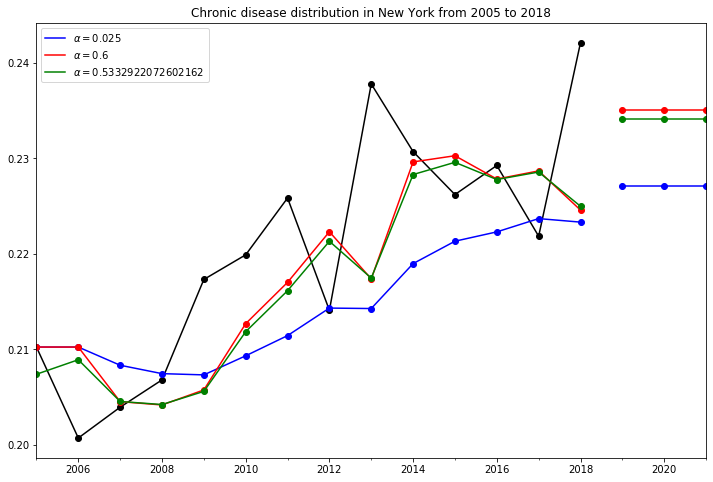

In [24]:
# Here we run three variants of simple exponential smoothing:
# 1.In fit1 we do not use the auto optimization but instead choose to explicitly provide the model with the 𝛼=0.025
# parameter  
# 2.In fit2 as above we choose an 𝛼=0.6
# 3.In fit3 we allow statsmodels to automatically find an optimized 𝛼 value for us. This is the recommended approach.


fit1 = SimpleExpSmoothing(chronicdisease2).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.025$')
fit2 = SimpleExpSmoothing(chronicdisease2).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(chronicdisease2).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = chronicdisease2.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
plt.title('Chronic disease distribution in New York from 2005 to 2018')
plt.show()

#observation:
#As can be seen the smoothing parameter 𝛼 picks up a smaller value as we input more years. The smaller the value of 𝛼 
#more years in the past are given importance.

In [27]:
#Let's plot the data from 2005 to 2018 for Alabama to understand how 𝛼 works


data3 = df2['Alabama'].values.tolist()
index3= pd.date_range(start='2005', end='2018', freq='AS')#here AS stands for 'year start frequency'. check pd.date_range
chronicdisease3 = pd.Series(data3, index3)



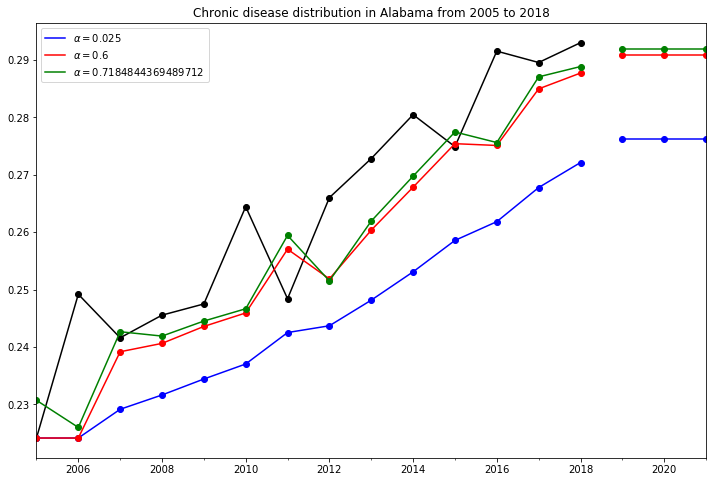

In [28]:
#Let's plot values for Alabama with years ranging from 2005 to 2018

fit1 = SimpleExpSmoothing(chronicdisease3).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.025$')
fit2 = SimpleExpSmoothing(chronicdisease3).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(chronicdisease3).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = chronicdisease3.plot(marker='o', color='black', figsize=(12,8))
fcast1.plot(marker='o', ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(marker='o', ax=ax, color='blue')
fcast2.plot(marker='o', ax=ax, color='red', legend=True)

fit2.fittedvalues.plot(marker='o', ax=ax, color='red')
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
plt.title('Chronic disease distribution in Alabama from 2005 to 2018')
plt.show()

#Observation:
#As can be seen 𝛼 picks a smaller value for Alabama (2005 to 2018). compare this with the plot above for Alabama from 2011 to 2018
#In both the plots the forecasted value for the chronic disease percentage is above 0.29. For Alabama 2005 to 2018
#the forecasted value is pretty close to 0.29 but for Alabama 2011 to 2018 the forecasted value is way above 0.29




In [43]:
#we allow statsmodels to automatically find an optimized 𝛼 value for us

fit_result = SimpleExpSmoothing(chronicdisease3).fit()
fcast_alabama = fit_result.forecast(3).rename(r'$\alpha=%s$'%fit_result.model.params['smoothing_level'])




In [44]:
#Forecasted values for 2019, 2020, 2021

fcast_alabama

2019-01-01    0.291811
2020-01-01    0.291811
2021-01-01    0.291811
Freq: AS-JAN, Name: $\alpha=0.7184844369489712$, dtype: float64

In [45]:
#Using smoothing_level=0.718


fit_result2 = SimpleExpSmoothing(chronicdisease3).fit(smoothing_level=0.718,optimized=False)
fcast_alabama2= fit_result2.forecast(3).rename(r'$\alpha=0.718$')




In [46]:
#Forecasted values for 2019, 2020, 2021
fcast_alabama2

2019-01-01    0.291808
2020-01-01    0.291808
2021-01-01    0.291808
Freq: AS-JAN, Name: $\alpha=0.718$, dtype: float64

In [ ]:
How to interpret the result?

Simple exponential smoothing has a "flat" forecast function. That is, all forecasts take the same value, equal to the 
last level component. Remember that these forecasts will only be suitable if the time series has no trend or seasonal 
component.

That is, all forecasts take the same value, equal to the last level component. Remember that these forecasts will only 
be suitable if the time series has no trend or seasonal component.

Interpreting the point forecasts without accounting for the large uncertainty can be very misleading.